Use tensorflow 2 to enable Eager execution by default.

In [0]:
!pip install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 348.9MB 52kB/s 
     |████████████████████████████████| 3.1MB 44.9MB/s 
     |████████████████████████████████| 501kB 51.2MB/s 


In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import random
import pickle

In [4]:
print(tf.__version__)

2.0.0-beta0


(60000, 784)


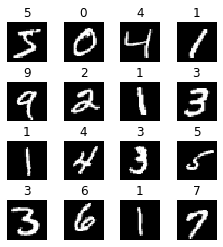

In [5]:
(train_images, train_labels), (_, _) = keras.datasets.mnist.load_data()
# train_images = np.expand_dims(train_images, axis = -1)
train_images = train_images.astype('float32') / 255
train_images = np.reshape(train_images, (train_images.shape[0],-1))
print(train_images.shape)
# show a batch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# A bunch of utility functions

def show_images(images, labels = None):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    fig.set_facecolor('w')
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.5)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
#         ax.set_aspect('equal')
        if labels is not None:
           ax.title.set_text(labels[i])
#         ax.
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return
show_images(train_images[0:16], train_labels[0:16])

In [0]:
def leaky_relu(x, alpha=0.01):
    """Compute the leaky ReLU activation function.
    
    Inputs:
    - x: TensorFlow Tensor with arbitrary shape
    - alpha: leak parameter for leaky ReLU
    
    Returns:
    TensorFlow Tensor with the same shape as x
    """
    # TODO: implement leaky ReLU
    return keras.backend.maximum(alpha*x, x)

In [0]:
batch_size = 128
noise_dim = 96
def sample_noise(batch_size=batch_size, dim=noise_dim):
    """Generate random uniform noise from -1 to 1.
    
    Inputs:
    - batch_size: integer giving the batch size of noise to generate
    - dim: integer giving the dimension of the the noise to generate
    
    Returns:
    TensorFlow Tensor containing uniform noise in [-1, 1] with shape [batch_size, dim]
    """
    # TODO: sample and return noise
    return keras.backend.random_uniform((batch_size, dim), -1, 1)

In [0]:
def init_discriminator():
    """Compute discriminator score for a batch of input images.
    
    Inputs:
    - x: TensorFlow Tensor of flattened input images, shape [batch_size, 784]
    
    Returns:
    TensorFlow Tensor with shape [batch_size, 1], containing the score 
    for an image being real for each input image.
    """
    # TODO: implement architecture
#     inputs = keras.Input(shape=(28, 28, 1))
#     outputs = keras.layers.Conv2D(256, (2,2), padding='same', activation=leaky_relu)(inputs)
#     outputs = keras.layers.BatchNormalization()(outputs)
#     outputs = keras.layers.Conv2D(512, (2,2), padding='same', activation=leaky_relu)(outputs)
#     outputs = keras.layers.BatchNormalization()(outputs)
#     outputs = keras.layers.Flatten()(inputs)
#     outputs = keras.layers.Dense(256)(outputs)
#     outputs = keras.layers.BatchNormalization()(outputs)
#     outputs = keras.layers.Activation(leaky_relu)(outputs)
#     outputs = keras.layers.Dense(256)(outputs)
#     outputs = keras.layers.BatchNormalization()(outputs)
#     outputs = keras.layers.Activation(leaky_relu)(outputs)
#     outputs = keras.layers.Dense(1)(outputs)
#     outputs = keras.layers.Activation('sigmoid')(outputs)
    inputs = keras.Input((784))
    outputs = keras.layers.Dense(256, activation=leaky_relu)(inputs)
    outputs = keras.layers.Dense(256, activation=leaky_relu)(outputs)
    outputs = keras.layers.Dense(1, activation='sigmoid')(outputs)
    
    return keras.Model(inputs, outputs)

In [0]:
def init_generator():
    """Generate images from a random noise vector.
    
    Inputs:
    - z: TensorFlow Tensor of random noise with shape [batch_size, noise_dim]
    
    Returns:
    TensorFlow Tensor of generated images, with shape [batch_size, 784].
    """
    # TODO: implement architecture
#     g_input = keras.Input(shape=[noise_dim])
#     H = keras.layers.Dense(14*14)(g_input)
#     H = keras.layers.BatchNormalization()(H)
#     H = keras.layers.Activation('relu')(H)
#     H = keras.layers.Reshape( [14, 14, 1] )(H)
#     H = keras.layers.UpSampling2D(size=(2, 2))(H)
#     H = keras.layers.Convolution2D(batch_size//2, (3, 3), padding='same')(H)
#     H = keras.layers.BatchNormalization()(H)
#     H = keras.layers.Activation('relu')(H)
#     H = keras.layers.Convolution2D(batch_size//4, (3, 3), padding='same')(H)
#     H = keras.layers.BatchNormalization()(H)
#     H = keras.layers.Activation('relu')(H)
#     H = keras.layers.Convolution2D(1, 1, 1, padding='same')(H)
#     g_V = keras.layers.Activation(keras.activations.tanh)(H)
#     return keras.Model(g_input,g_V)
    inputs = keras.Input(shape=(noise_dim))
    outputs = keras.layers.Dense(1024, activation='relu')(inputs)
    outputs = keras.layers.Dense(1024, activation='relu')(outputs)
    img = keras.layers.Dense(784, activation=keras.activations.tanh)(outputs)
#     img = keras.layers.Reshape((28, 28, 1))(outputs)
    return keras.Model(inputs, img)

In [0]:
keras.backend.clear_session()

In [0]:
generator = init_generator()
discriminator = init_discriminator()

In [0]:
def init_GAN():
  g_input = keras.Input(shape=[noise_dim])
  g_output = generator(g_input)
  d_output = discriminator(g_output)
  return keras.Model(g_input, d_output)

In [0]:
def create_optimizer(learning_rate=1e-3, beta1=0.5):
    """Create solvers for GAN training.
    
    Inputs:
    - learning_rate: learning rate to use for both solvers
    - beta1: beta1 parameter for both solvers (first moment decay)
    
    Returns:
    - D_optimizer: instance of tf.train.AdamOptimizer with correct learning_rate and beta1
    - G_optimizer: instance of tf.train.AdamOptimizer with correct learning_rate and beta1
    """
    D_optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1)
    G_optimizer = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1)
    return D_optimizer, G_optimizer

In [0]:
D_optimizer, G_optimizer = create_optimizer()

In [0]:
loss_func = keras.losses.binary_crossentropy
generator.compile(loss='binary_crossentropy', optimizer=G_optimizer)
discriminator.compile(loss=loss_func, optimizer=D_optimizer)
discriminator.trainable = False
for layer in discriminator.layers:
  layer.trainable = False
GAN = init_GAN()
GAN.compile(loss=loss_func, optimizer=G_optimizer)

In [0]:
def plot_loss(losses):
        plt.figure(figsize=(10,8))
        plt.plot(losses["d"], label='discriminitive loss')
        plt.plot(losses["g"], label='generative loss')
        plt.legend()
        plt.show()

In [0]:
def plot_gen():
    noise = sample_noise()
    generated_images = generator.predict(noise)
    show_images(generated_images[0:8])

In [0]:
def sl_weight(save = True, keep_his = False):
  if save:
    discriminator.save_weights('d_weights')
    generator.save_weights('g_weights')
    GAN.save_weights('gan.weights')
    if keep_his:
      with open('losses.pkl', 'wb') as file:
        pickle.dump(losses, file)
  else:
    discriminator.load_weights('d_weights')
    generator.load_weights('g_weights')
    GAN.load_weights('gan.weights')
    if keep_his:
      with open('losses.pkl', 'rb') as file:
        losses = pickle.load(file)
        plot_loss(losses)

In [0]:
def create_train_data(batch_size = batch_size):
  trainidx = np.random.randint(0, train_images.shape[0], batch_size)
  X_real = train_images[trainidx]
  noise = sample_noise(batch_size)
  X_fake = generator(noise, training=False)
  X_train = np.concatenate((X_real, X_fake))
  y_train = np.zeros((2*batch_size))
  y_train[0:batch_size] = 1
#   y_train[:batch_size,1] = 1
#   y_train[batch_size:,0] = 1

  return X_train, y_train

In [0]:
discriminator.trainable = False
# for layer in discriminator.layers:
#   layer.trainable = True
discriminator.summary()
generator.summary()
# y_train = np.ones(train_images.shape[0])
# discriminator.fit(train_images, y_train, batch_size=128, epochs=10)
# for d_train_substep in range(500):
#   X_train, y_train = create_train_data()
#   d_loss = discriminator.train_on_batch(X_train, y_train)
#     print(d_loss)
# discriminator.trainable = False
# for layer in discriminator.layers:
#   layer.trainable = False

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024

In [0]:
GAN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96)]              0         
_________________________________________________________________
model (Model)                (None, 28, 28, 1)         39317     
_________________________________________________________________
model_1 (Model)              (None, 2)                 269314    
Total params: 308,631
Trainable params: 38,733
Non-trainable params: 269,898
_________________________________________________________________


In [48]:
discriminator.trainable = True
for layer in discriminator.layers:
  layer.trainable = True
for i in range(10):
  X_train, y_train = create_train_data(1024)
  discriminator.fit(X_train, y_train)
#   d_loss = discriminator.train_on_batch(X_train, y_train)

Train on 2048 samples
2048/2048 [==============================] - 0s 121us/sample - loss: 0.0420
Train on 2048 samples
2048/2048 [==============================] - 0s 85us/sample - loss: 1.7095e-04
Train on 2048 samples
2048/2048 [==============================] - 0s 90us/sample - loss: 6.0738e-05
Train on 2048 samples
2048/2048 [==============================] - 0s 86us/sample - loss: 2.7853e-05
Train on 2048 samples
2048/2048 [==============================] - 0s 84us/sample - loss: 2.0760e-05
Train on 2048 samples
2048/2048 [==============================] - 0s 82us/sample - loss: 1.4759e-05
Train on 2048 samples
2048/2048 [==============================] - 0s 80us/sample - loss: 8.0273e-06
Train on 2048 samples
2048/2048 [==============================] - 0s 83us/sample - loss: 6.6781e-06
Train on 2048 samples
2048/2048 [==============================] - 0s 84us/sample - loss: 4.4555e-06
Train on 2048 samples
2048/2048 [==============================] - 0s 72us/sample - loss: 5.16

In [0]:
def train_step():
  discriminator.trainable = True
  for layer in discriminator.layers:
    layer.trainable = True
  for d_train_substep in range(1):
    X_train, y_train = create_train_data()
    d_loss = discriminator.train_on_batch(X_train, y_train)
  discriminator.trainable = False
  for layer in discriminator.layers:
    layer.trainable = False
  noise = sample_noise()
  y_generative = np.ones((batch_size))
  g_loss = GAN.train_on_batch(noise, y_generative)
  return d_loss, g_loss

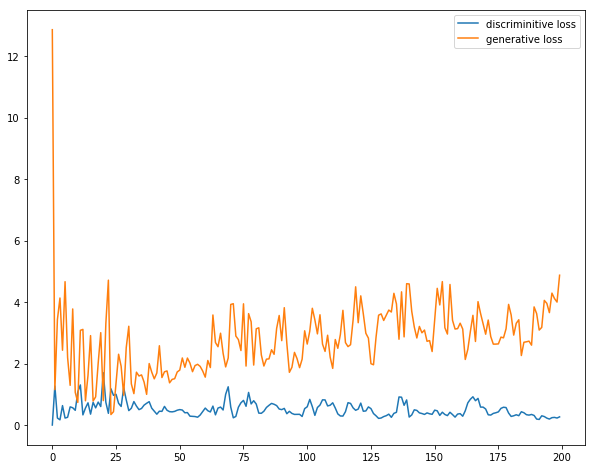

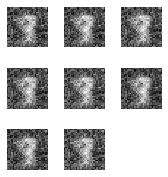

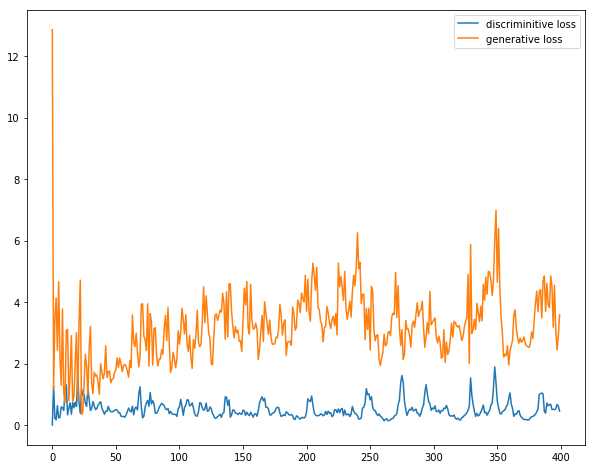

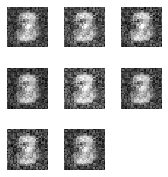

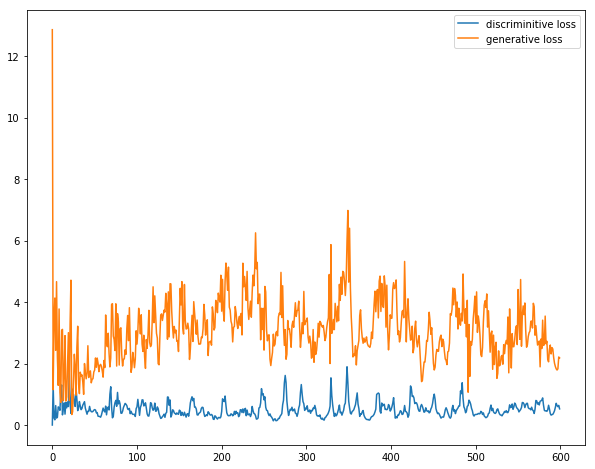

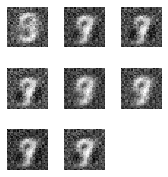

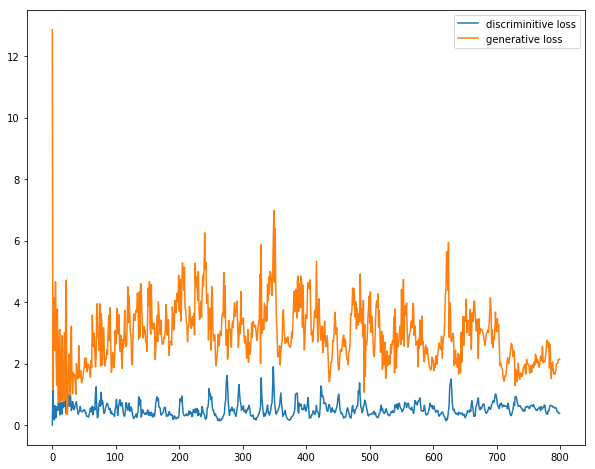

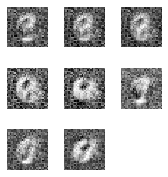

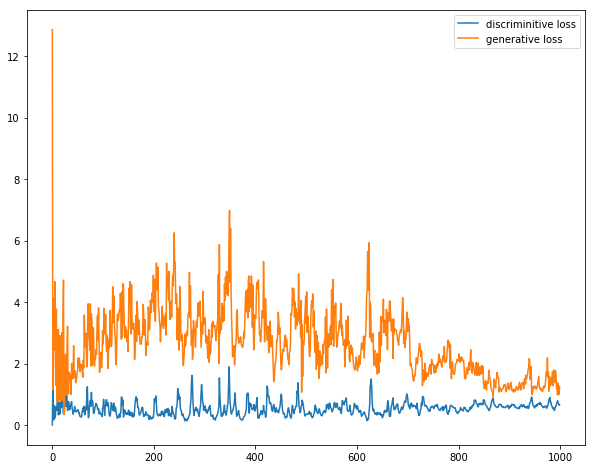

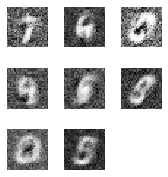

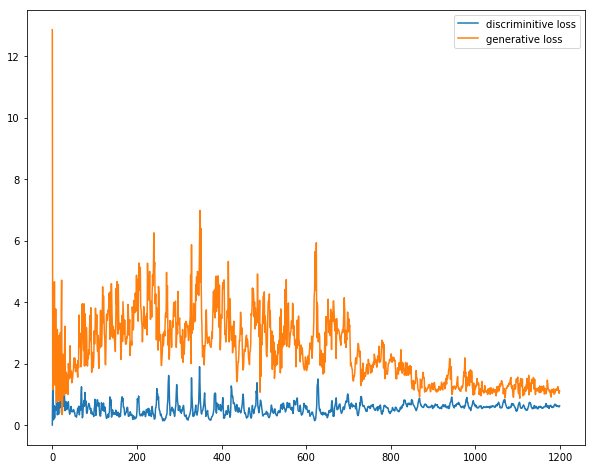

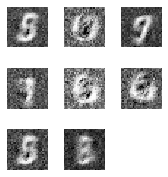

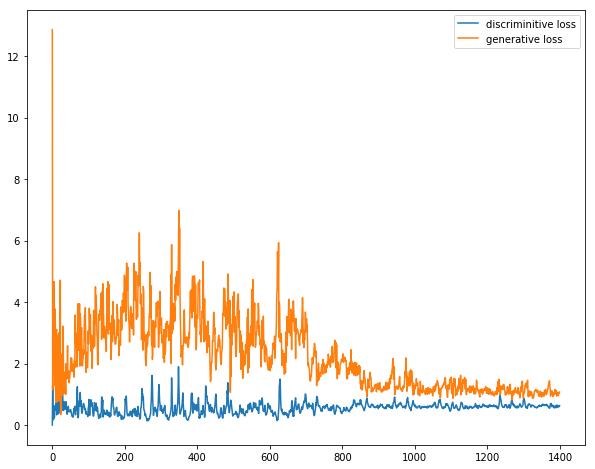

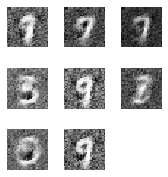

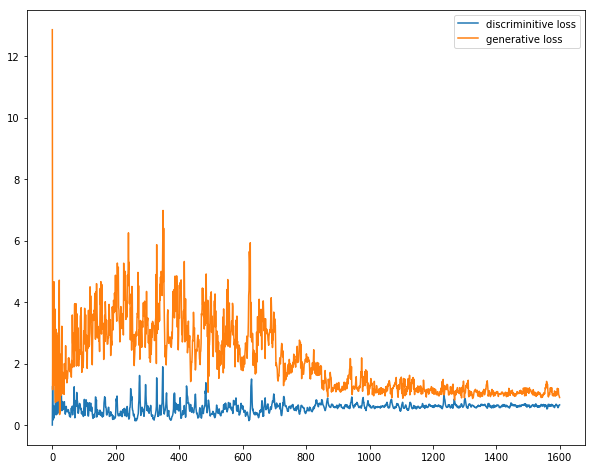

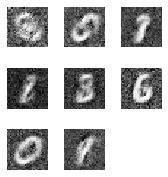

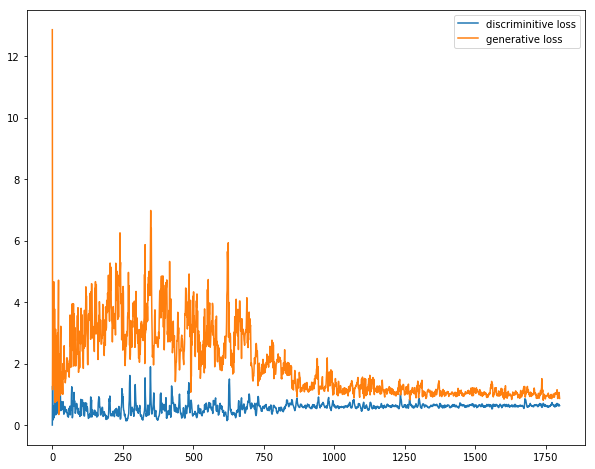

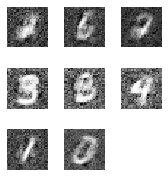

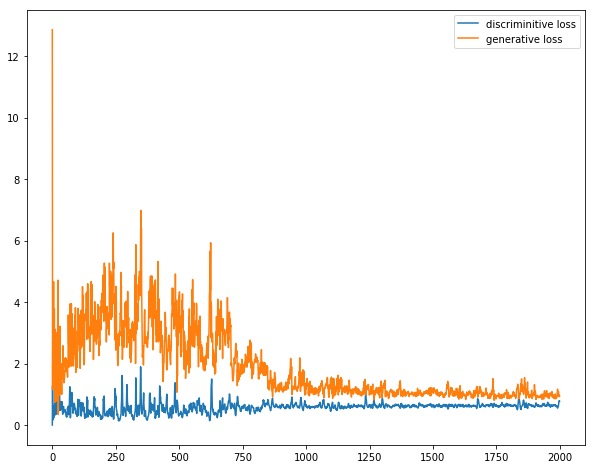

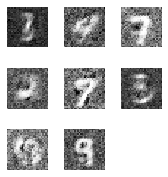

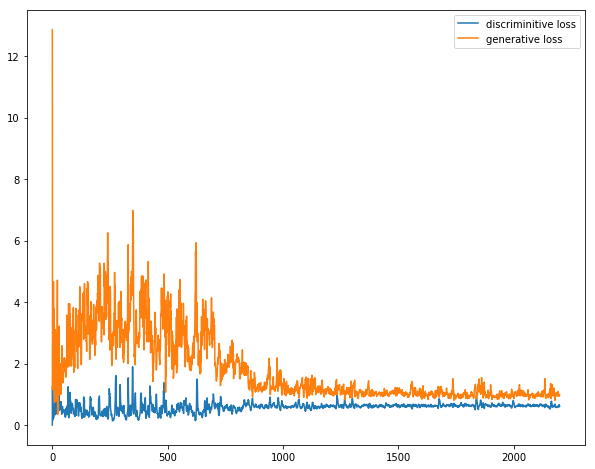

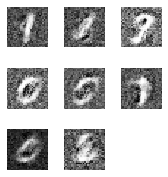

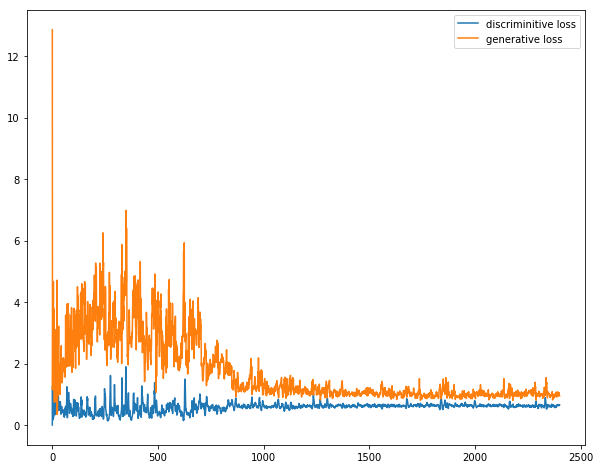

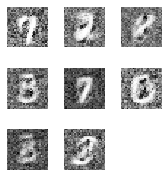

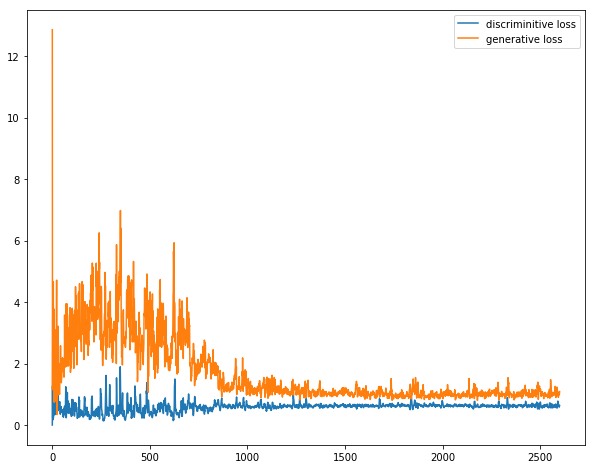

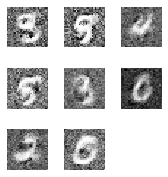

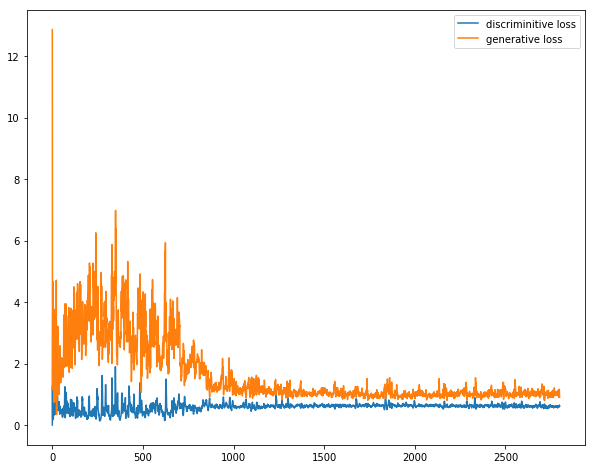

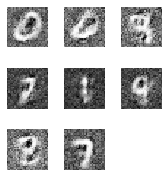

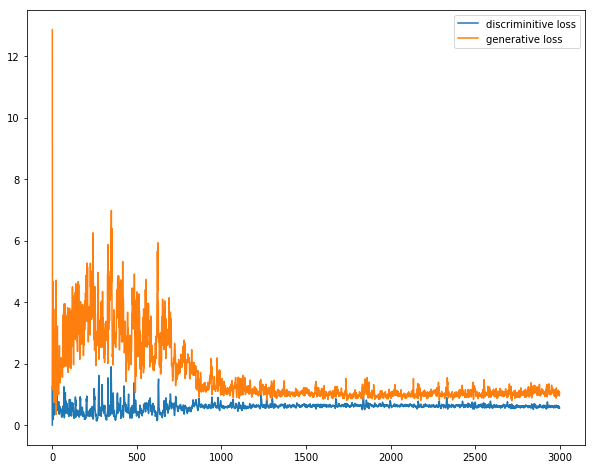

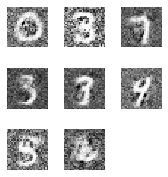

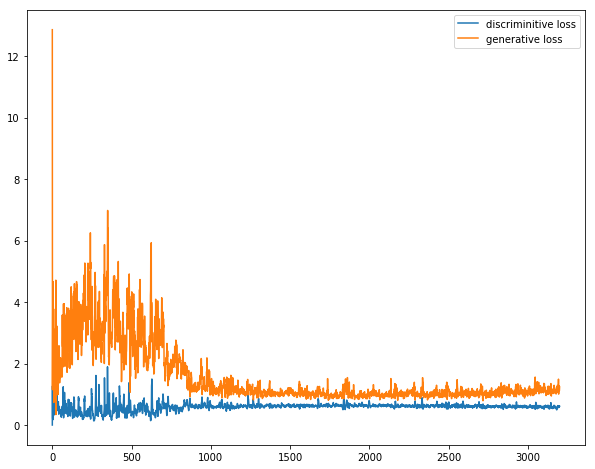

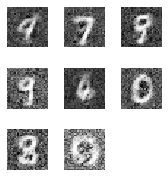

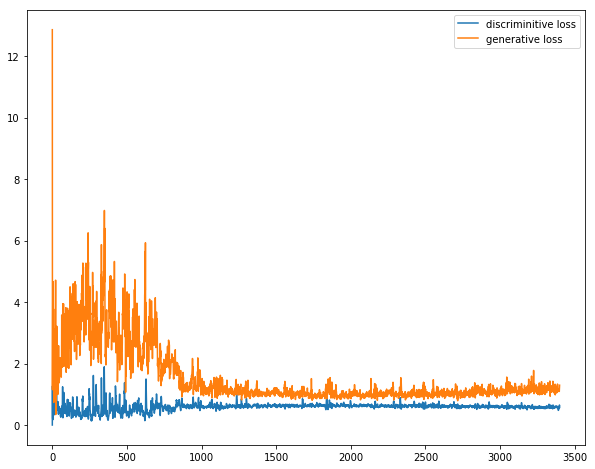

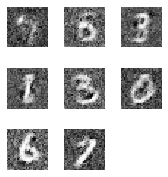

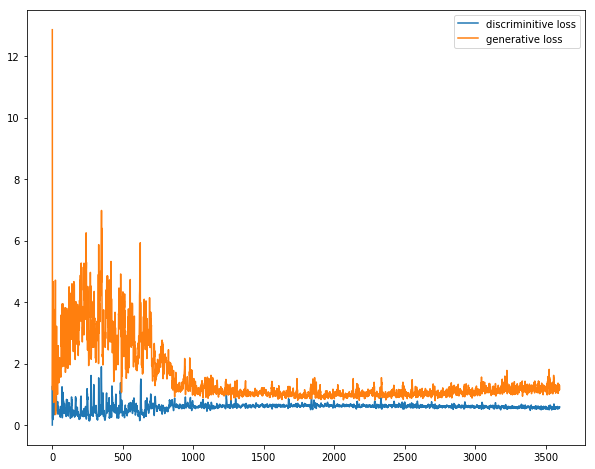

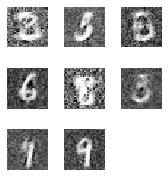

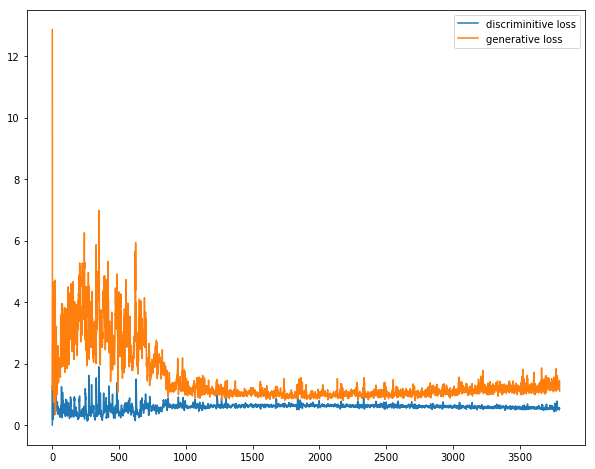

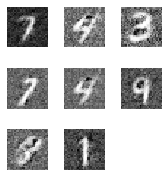

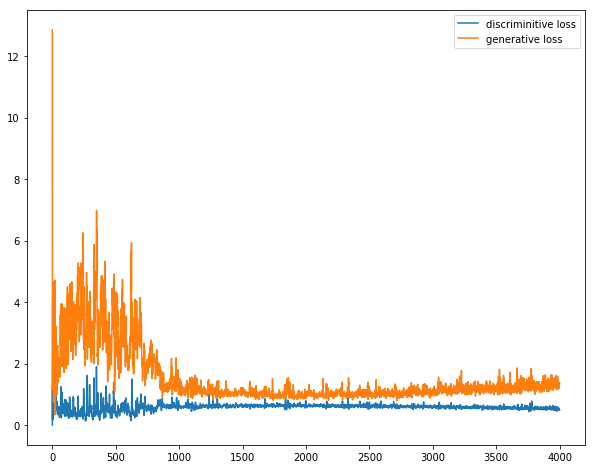

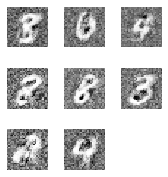

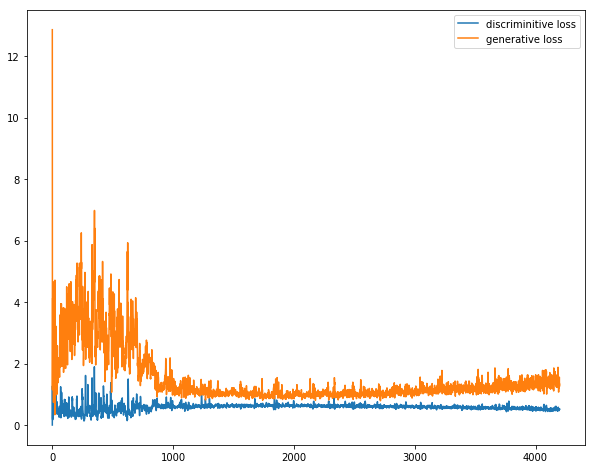

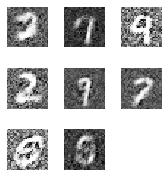

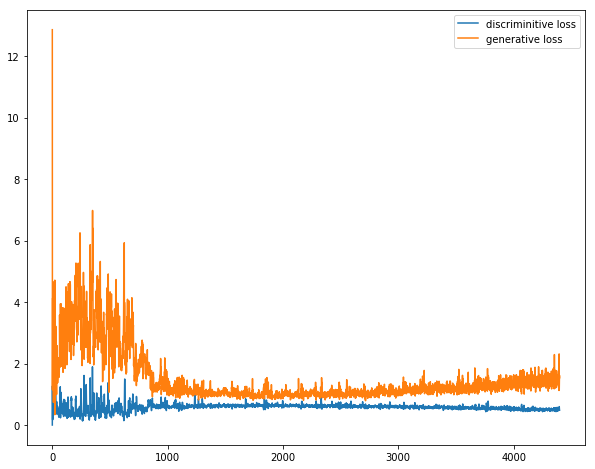

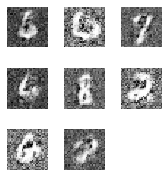

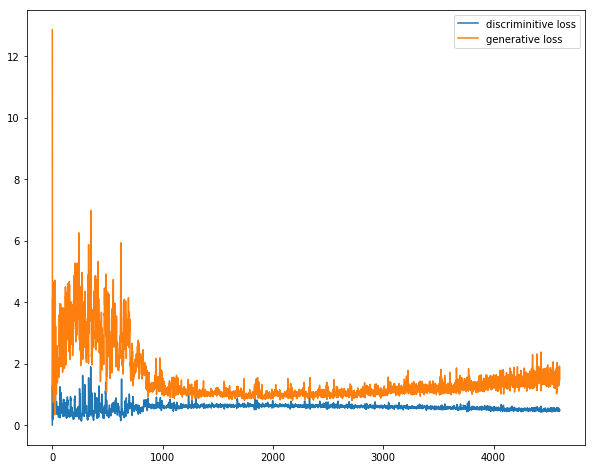

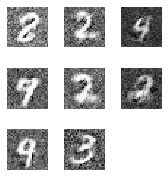

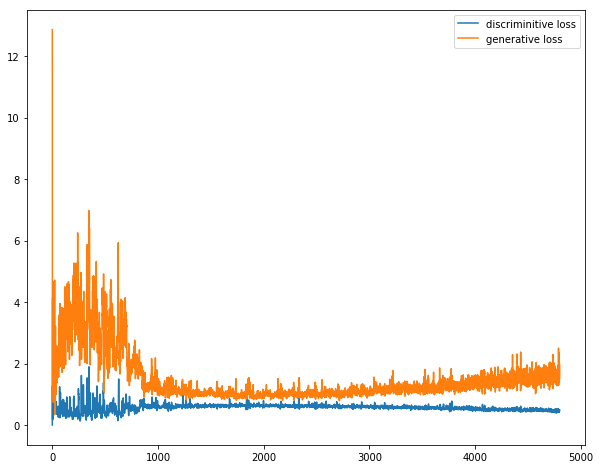

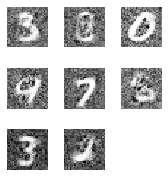

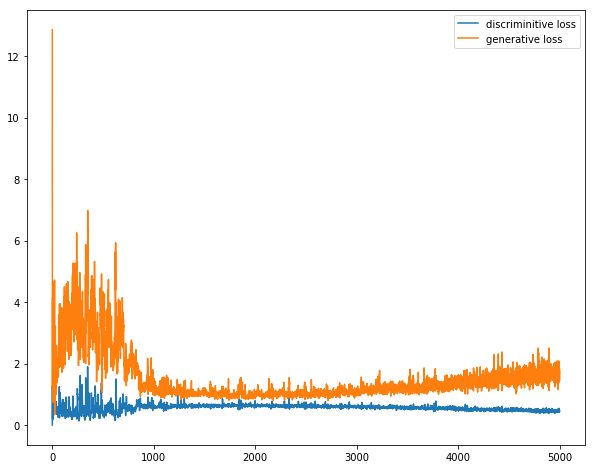

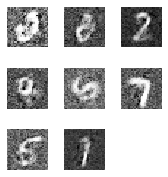

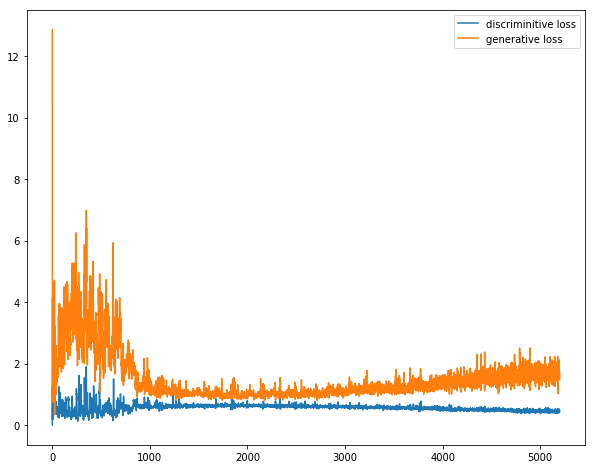

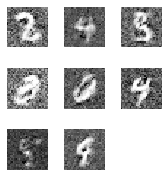

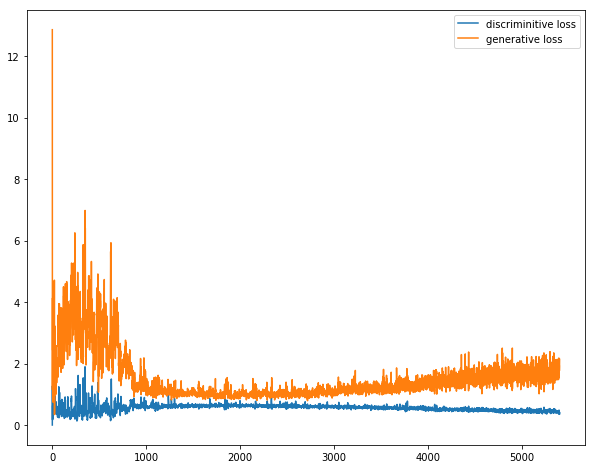

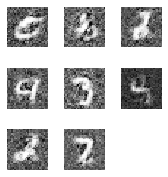

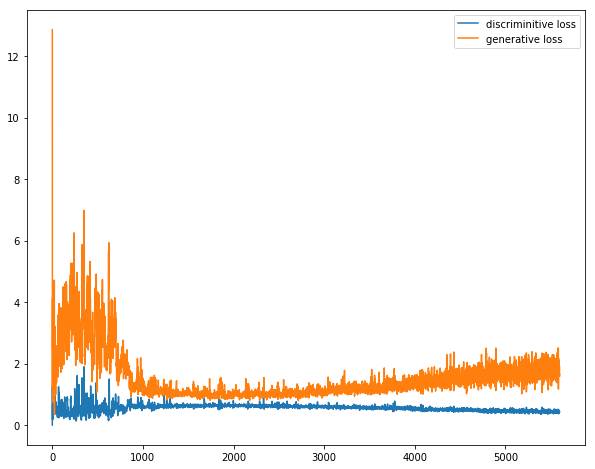

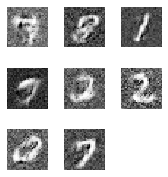

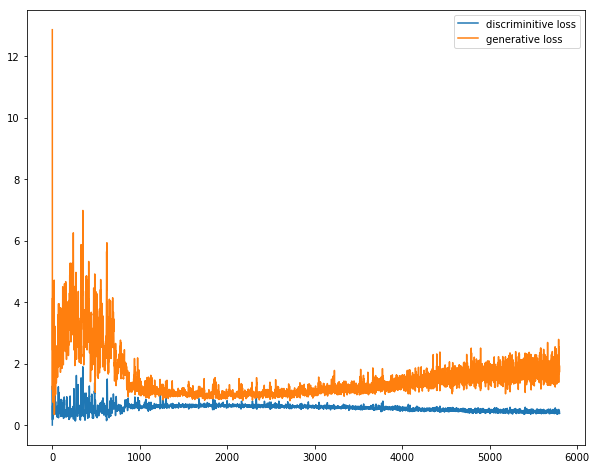

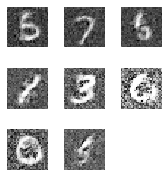

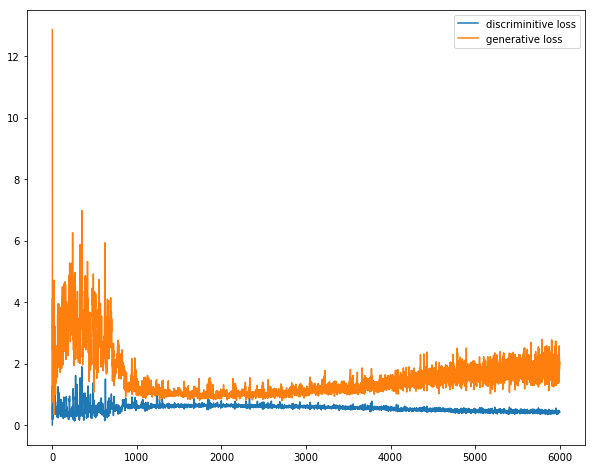

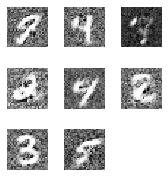

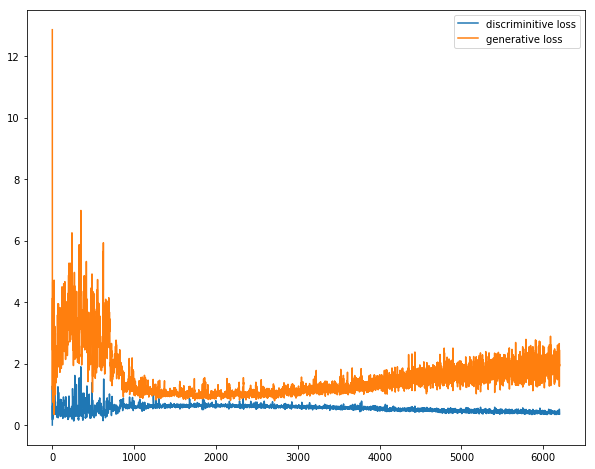

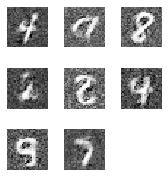

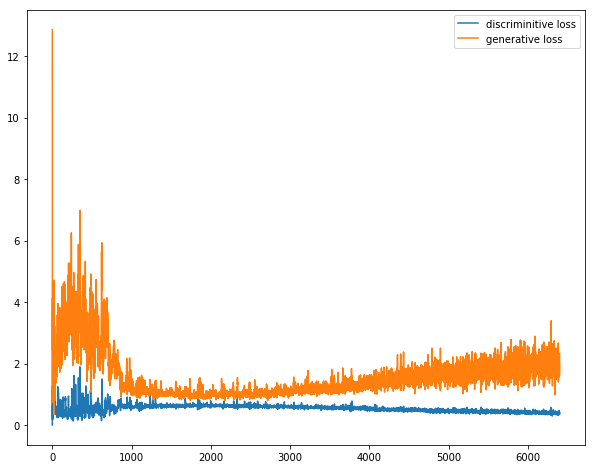

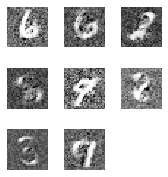

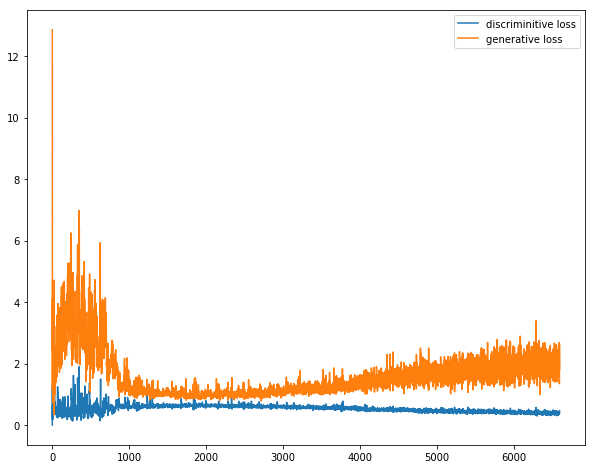

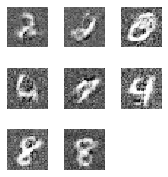

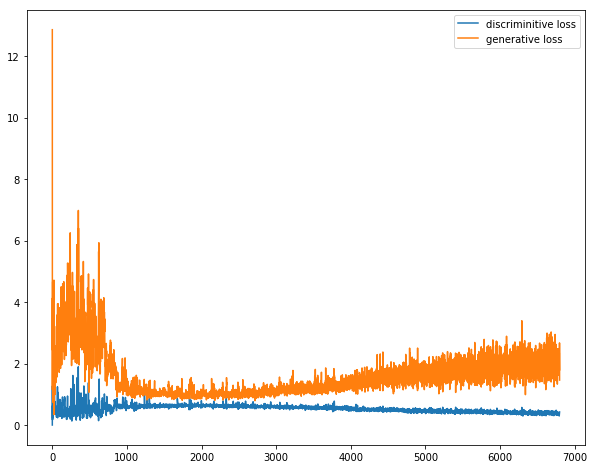

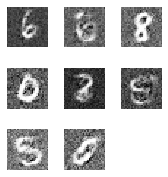

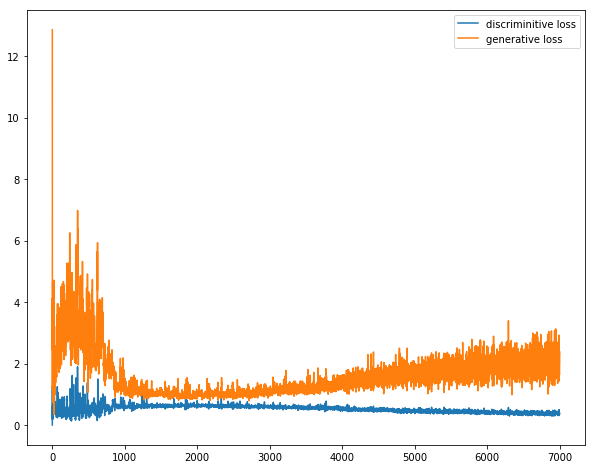

In [0]:
EPOCH = 10000
# if not losses:
losses = {'d':[], 'g':[]}
for epoch in range(EPOCH):
  d_loss, g_loss = train_step()
  losses["d"].append(d_loss)
  losses["g"].append(g_loss)
  if epoch % 200 == 199:
    plot_loss(losses)
    plot_gen()
  if epoch % 1000 == 999:
    sl_weight()
    

In [0]:
sl_weight(False)

In [0]:
keras.backend.set_value(G_optimizer.lr, 1e-6)
keras.backend.set_value(D_optimizer.lr, 1e-7)
# set_value(opt.lr, 1e-4)
# K.set_value(dopt.lr, 1e-5)

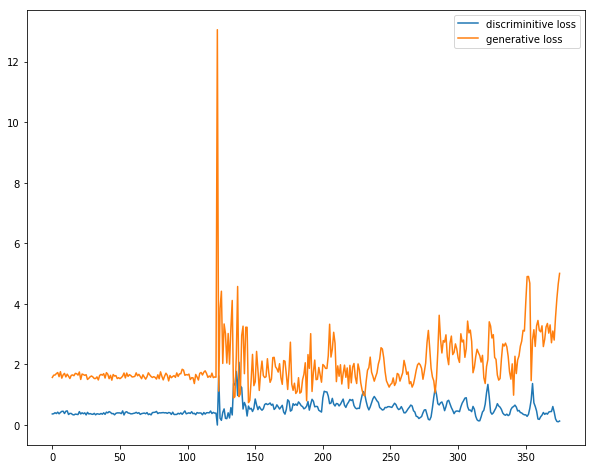

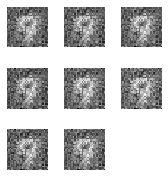

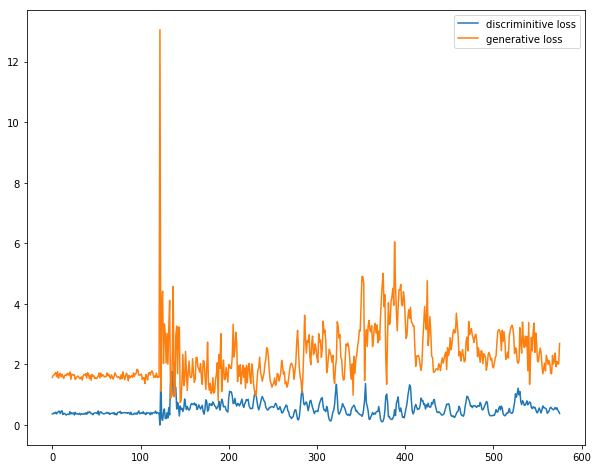

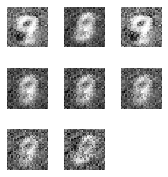

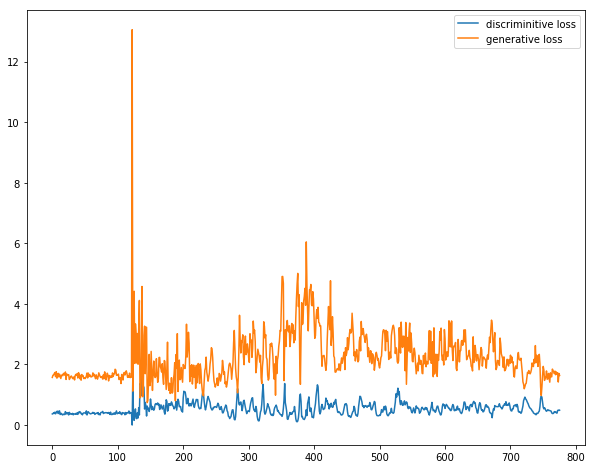

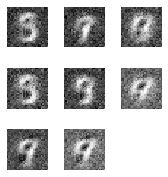

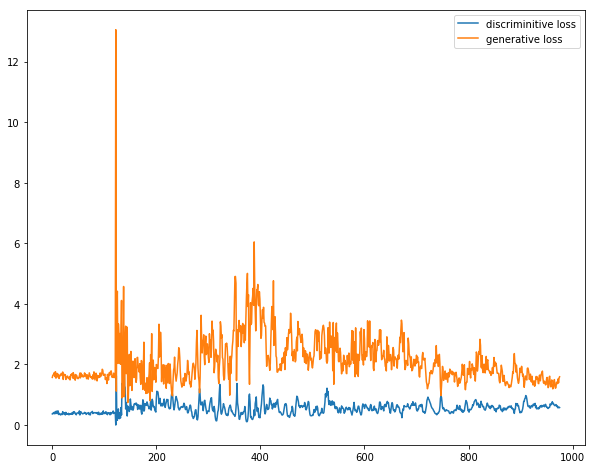

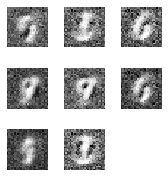

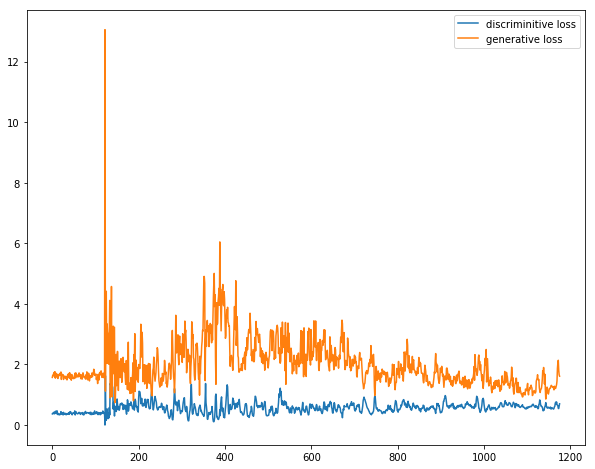

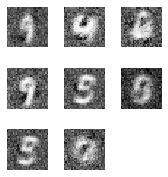

In [53]:
# losses = {'d':[], 'g':[]}
earlystopping_cnt = 0
for epoch in range(20000):
  d_loss, g_loss = train_step()
  losses["d"].append(d_loss)
  losses["g"].append(g_loss)
  if len(losses["g"])>10:
    if losses["g"][-1] > np.min(losses["g"]):
      earlystopping_cnt += 1
      if earlystopping_cnt>1000:
        break
  if epoch % 200 == 199:
    plot_loss(losses)
    plot_gen()

In [51]:
losses["g"]

[1.5716755,
 1.6452389,
 1.6517572,
 1.6979811,
 1.7329459,
 1.5974288,
 1.7609569,
 1.5479548,
 1.6561155,
 1.7057433,
 1.5887682,
 1.6801649,
 1.612528,
 1.5365922,
 1.6411031,
 1.6543674,
 1.6283172,
 1.7054629,
 1.6951385,
 1.6478577,
 1.7514849,
 1.5050888,
 1.6844817,
 1.6649745,
 1.6408302,
 1.6619062,
 1.50449,
 1.5442775,
 1.5947723,
 1.618993,
 1.5864666,
 1.5354958,
 1.5354334,
 1.5896454,
 1.4890313,
 1.6365099,
 1.6714667,
 1.6465471,
 1.6958898,
 1.5517368,
 1.7297354,
 1.6788974,
 1.530616,
 1.6421402,
 1.4812851,
 1.6672019,
 1.617588,
 1.6318659,
 1.5350261,
 1.5627726,
 1.5321486,
 1.5645888,
 1.6148598,
 1.7168111,
 1.5558877,
 1.7159023,
 1.6057551,
 1.6626484,
 1.6354628,
 1.5871332,
 1.5935919,
 1.6055661,
 1.7218521,
 1.6253351,
 1.6740055,
 1.6008215,
 1.5302099,
 1.6582375,
 1.5825305,
 1.5146995,
 1.5950779,
 1.723767,
 1.6579384,
 1.6032231,
 1.5703261,
 1.5973449,
 1.5731162,
 1.5168855,
 1.6575996,
 1.5288534,
 1.7556276,
 1.6080389,
 1.490667,
 1.6129284,


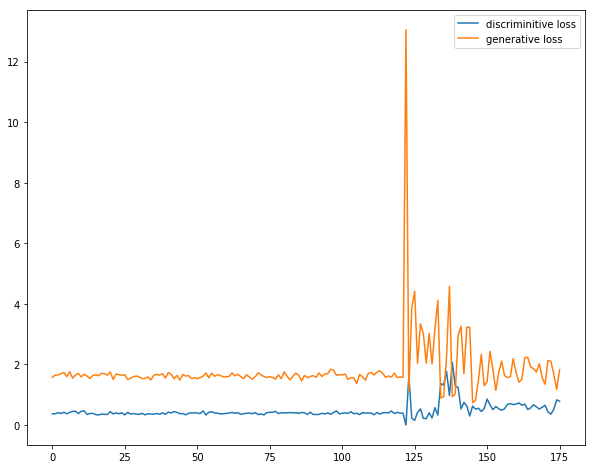

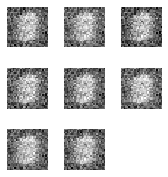

In [52]:
    plot_loss(losses)
    plot_gen()

In [0]:
noise = sample_noise()
y_generative = np.ones((batch_size, 2))
y_generative[:, 1] = 1
# x = generator(noise)
# GAN(noise)
# show_images(x)
# discriminator(x)
# discriminator(train_images[0:20])
GAN.evaluate(noise, y_generative)
# g_loss = GAN.train_on_batch(noise, y_generative)
# print(g_loss)

128/128 [==============================] - 0s 1ms/sample - loss: 1.3882


1.3881566226482391

In [0]:


f = open("losses.pkl","wb")
pickle.dump(losses, f)
f.close()

In [0]:
with open('losses.pkl', 'rb') as file:
  data = pickle.load(file)
  plot_loss(data)

NameError: ignored

In [0]:
print(answers['logits_real'])
print(answers['logits_fake'])

[[ 0.93487311]
 [-1.01698916]
 [-0.57304769]
 [-0.88162704]
 [-1.40129389]
 [-1.45395693]
 [-1.54239755]
 [-0.57273325]
 [ 0.98584429]
 [ 0.13312152]]
[[-1.80865868]
 [ 0.09030055]
 [-0.4428902 ]
 [-0.07879368]
 [-0.37655044]
 [ 0.32084742]
 [-0.28590837]
 [ 1.01376281]
 [ 0.99241439]
 [ 0.39394346]]


In [0]:
logits_fake = [0, 0, 0]
fake_labels = keras.backend.zeros_like(logits_fake)
true_labels = keras.backend.ones_like(logits_real)
real_loss_d = keras.losses.binary_crossentropy(true_labels, logits_real, from_logits=True)
fake_loss_d = keras.losses.binary_crossentropy(fake_labels, logits_fake, from_logits=True)
fake_loss_g = keras.losses.binary_crossentropy(true_labels, logits_fake, from_logits=True)
# TODO: compute D_loss and G_loss
D_loss = keras.backend.mean(real_loss_d+fake_loss_d)

In [0]:
def gan_loss(logits_real, logits_fake):
    """Compute the GAN loss.
    
    Inputs:
    - logits_real: Tensor, shape [batch_size, 1], output of discriminator
        Log probability that the image is real for each real image
    - logits_fake: Tensor, shape[batch_size, 1], output of discriminator
        Log probability that the image is real for each fake image
    
    Returns:
    - D_loss: discriminator loss scalar
    - G_loss: generator loss scalar
    """
    fake_labels = keras.backend.zeros_like(logits_fake)
    true_labels = keras.backend.ones_like(logits_real)
    real_loss_d = keras.losses.binary_crossentropy(true_labels, logits_real, from_logits=True)
    fake_loss_d = keras.losses.binary_crossentropy(fake_labels, logits_fake, from_logits=True)
    fake_loss_g = keras.losses.binary_crossentropy(true_labels, logits_fake, from_logits=True)
    # TODO: compute D_loss and G_loss
    D_loss = keras.backend.mean(real_loss_d+fake_loss_d)
    G_loss = keras.backend.mean(fake_loss_g)
    return D_loss, G_loss

In [0]:
checkpoint_dir = './training_checkpoints/model.ckpt'
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

NameError: ignored